In [2]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv("./titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# 간단한 EDA
display(df.dtypes)

df.isnull().sum()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# 결측값 처리
# 나이: 중앙값
df['Age'] = df['Age'].fillna(df['Age'].median())

# Embarked : 최빈값
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
df['Embarked'] = df['Embarked'].fillna('S')

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
df['Cabin'].unique()
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [7]:
df = df.drop(labels='Cabin', axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

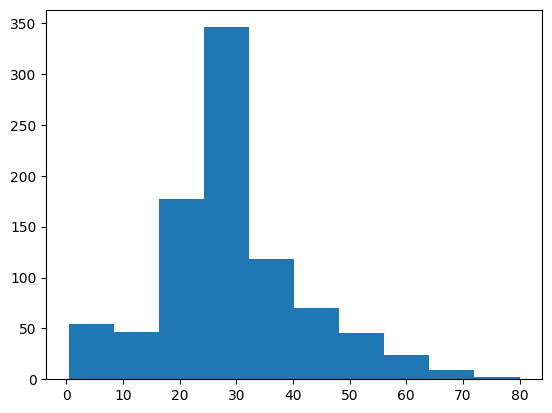

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['Age'])
plt.show

In [9]:
# Fare 의 IQR 구하기
df2 = df['Fare']

Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)

IQR = Q3 - Q1

print("IQR : ", IQR)

Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

IQR :  23.0896


(-26.724, 65.6344)

In [10]:
# Fare 이상치 데이터 구하기
outlier1 = df[df2 < Q1 - 1.5 * IQR]
outlier2 = df[df2 > Q3 + 1.5 * IQR]

len(outlier1), len(outlier2)

(0, 116)

In [11]:
# Fare 이상치 데이터에서 여성의 수
print(sum(outlier2['Sex']=="female"))

70


# [상관계수]
두 변수가 어떤 선형적 관계에 있는지를 분석하는 방법이다. 두 변수 간 관계의 강도를 상관관계라고 한다.

## 1. 수치형 - 수치형

### 1) Pearson Correlation(피어슨 상관계수)
피어슨 상관계수는 두 변수의 결합은 정규분포일 것이라는 가정이 포함되어 있으며 구조적으로 볼 때 이상치(outlier)에 매우 민감한 편이다.

주의사항: 결과를 보고 상관관계가 인과관계와 관련이 있을 것이라는 확대해석을 하지 말아야하며 단순하게 두 변수가 연관성이 있다로만 결론을 내려야 한다.

<ipython-input-12-6948671c3cf8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_pearson = df.corr(method = 'pearson')


<Axes: >

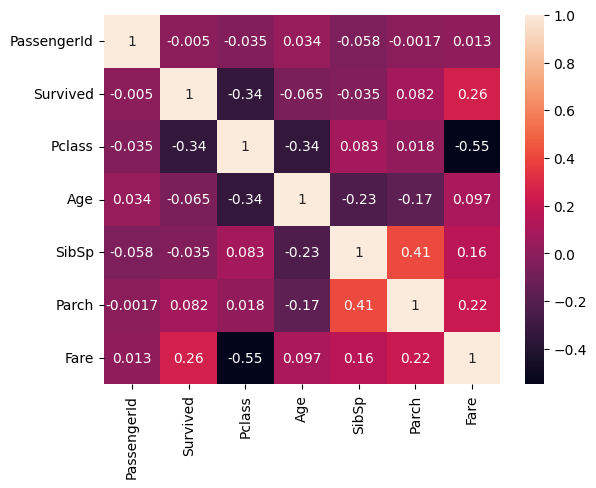

In [12]:
import seaborn as sns

df_pearson = df.corr(method = 'pearson')
sns.heatmap(df_pearson, annot = True)

### 2) Spearman Correlation(스피어만 상관계수)
스피어만 상관계수는 비모수적 상관계수로, 상관 계수를 계산할 때 두 데이터의 실제 값 대신 두 값의 순위를 사용해 상관 계수를 계산하는 방식이다.

연속형 데이터에 적합한 피어슨 상관계수와 달리 discrete 데이터, ordinal(순서형) 데이터가 포함된 관계를 평가하기 위해 사용한다.

스피어만 상관계수는 데이터 내 편차와 에러에 민감하여 일반적으로 켄달 상관계수보다 높은 값을 가진다.

ex) 직원들이 테스트 연습을 완료하는 순서가 고용된 개월 수와 관련이 있는지 여부를 평가



<ipython-input-13-5a8cda50fa53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_spearman = df.corr(method = 'spearman')


<Axes: >

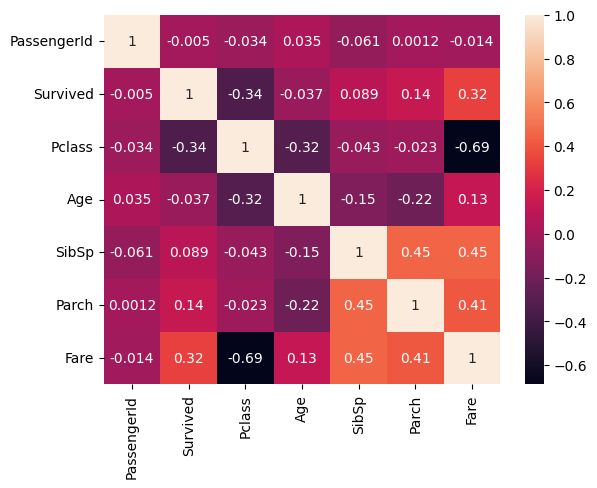

In [13]:
df_spearman = df.corr(method = 'spearman')
sns.heatmap(df_spearman, annot = True)

### 3) Kendall Correlation(켄달 상관계수)
켄달 상관계수는 비모수적 상관계수로, 두 변수들 간의 순의를 비교하여 연관성을 계산한다. 켄달 상관계수는 샘플 사이즈가 작거나 데이터의 동률이 많을 때 유용하다.


<ipython-input-14-63c044dd82fe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_kendall = df.corr(method='kendall')


<Axes: >

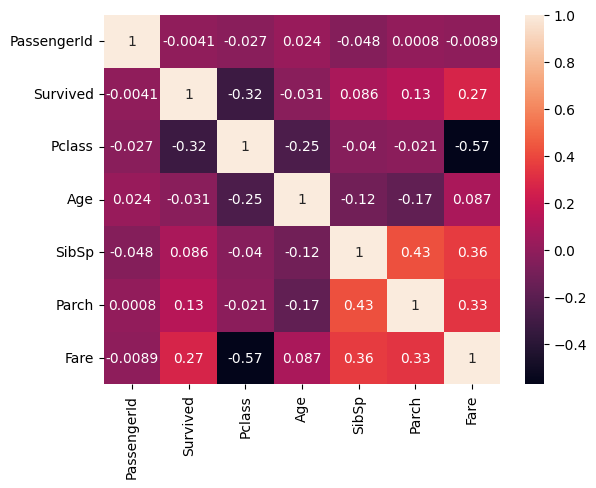

In [14]:
df_kendall = df.corr(method='kendall')
sns.heatmap(df_kendall, annot = True)

## 2. 범주형 - 수치형

### 1) Point biserial correlation(점이연 상관계수)

하나가 연속변수이고 다른 하나가 이분변수일 때 사용하는 상관계수이다. 이분변수를 0과 1로 변환한 후에 pearson 상관계수를 계산하면 점이연 상관계수를 구할 수 있다.

검사에서 총점과 문항(correct/incorrect 혹은 yes/no) 간의 상관계수를 구할 때 자주 사용되며, 두 집단의 T-검증과 밀접한 관련이 있다.


In [15]:
# 나이, Fare와 생존여부 간의 상관계수
df['Survived'].unique()

array([0, 1])

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

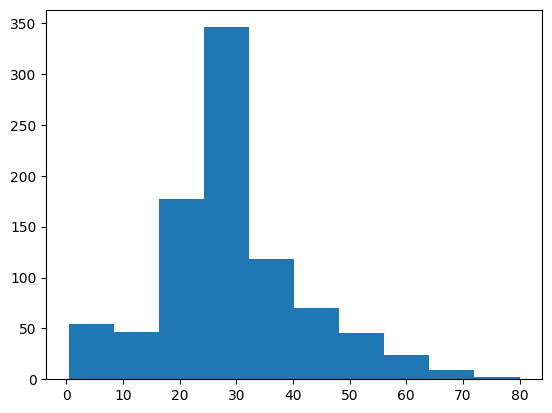

In [16]:
plt.hist(df['Age'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

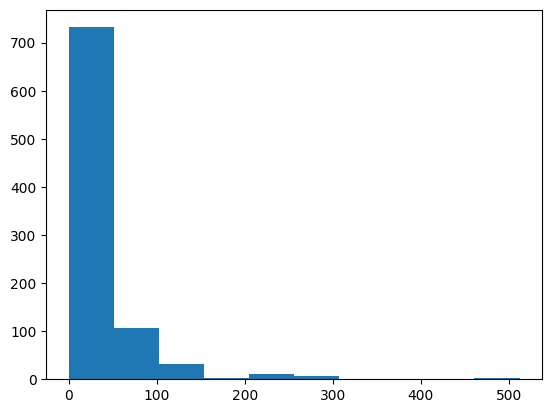

In [17]:
plt.hist(df['Fare'])

In [18]:
#Point biserial correlation

from scipy import stats

# x: 이분변수 / y: 연속변수
pointbiserialcorr1 = stats.pointbiserialr(df['Survived'],df['Age'])
pointbiserialcorr2 = stats.pointbiserialr(df['Survived'],df['Fare'])

pointbiserialcorr1, pointbiserialcorr2


(SignificanceResult(statistic=-0.06491041993052585, pvalue=0.05276068847585567),
 SignificanceResult(statistic=0.2573065223849624, pvalue=6.120189341924608e-15))

### 2) Biserial correlation(이연 상관계수)

하나가 연속변수이고 다른 하나가 이분변수일 때 사용하는 상관계수이다. 이분 변수가 원래 연속 변수인데 이분화한 경우에 사용한다.

이분화되지 않았을 때 두 연속변수들간의 상관계수를 추정하는 방식으로 상관계수를 구한다.

<function matplotlib.pyplot.show(close=None, block=None)>

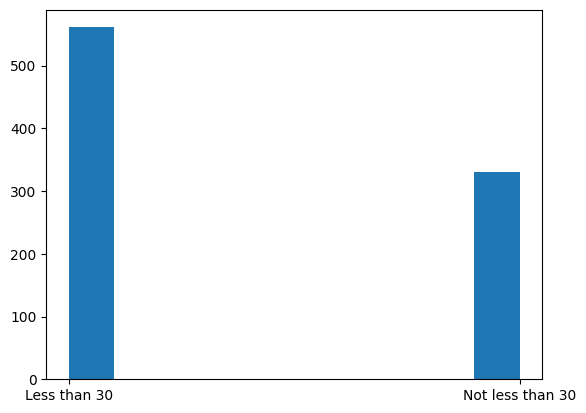

In [19]:
# 연속변수인 Age를 이분화 예시
def age_groups(age):
  if age < 30:
    return "Less than 30" #30 미만
  else:
    return "Not less than 30" #30 이상

df['Age_group'] = df['Age'].apply(age_groups)

plt.hist(df['Age_group'])
plt.show

### 3) Polyserial correlation

X변수가 연속형이고 Y변수의 범주화가 3개 이상인 경우에 사용한다.

## 3. 범주형 - 범주형
1) Phi coefficient(파이 계수)

X, Y변수 모두 남/여 또는 있다/없다 등 이분변수일 때 두 변수간의 상관분석을 하는 방법이다.

파이 계수의 상관계수 값은 0 ~ 1 사이의 범위를 갖는다.
0에 가까울수록 상관관계가 낮고, 1에 가까울수록 상관관계가 높다고 해석된다.

머신러닝에서는 MCC(Matthews Correlation Coefficient)라고 부른다.

In [20]:
from sklearn.metrics import matthews_corrcoef

Sex = df['Sex'].replace(to_replace=['female', 'male'],value=[0,1])
Survived = df['Survived'].values

y_true = Sex
y_pred = Survived

matthews_corrcoef(y_true, y_pred)

-0.5433513806577551

2) Cramer's V coefficient(크래머 V계수)

파이 상관계수와 유사한데, 둘 중 하나의 변수라도 값이 3개 이상이라면 Cramer's V를 사용한다.

파이 계수의 상관계수 값은 0 ~ 1 사이의 범위를 갖는다. 0에 가까울수록 상관관계가 낮고, 1에 가까울수록 상관관계가 높다고 해석된다.


In [21]:
df['Pclass'].unique()

array([3, 1, 2])

In [22]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt(stat/(obs*mini))

cramers_V(df['Pclass'],df['Survived'])

0.33981738800531175

# [다중공선성]

독립변수(feature)간 상관관계가 있는 것을 의미한다. 다중 공선성을 측정하는 방법으로 VIF(Variance Inflantion Factor)를 사용한다.

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.read_csv("https://raw.githubusercontent.com/signature95/tistory/main/dataset/boston.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [27]:
data.corr()

# 일부 feature의 corr가 높음 확인할 수 있다.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


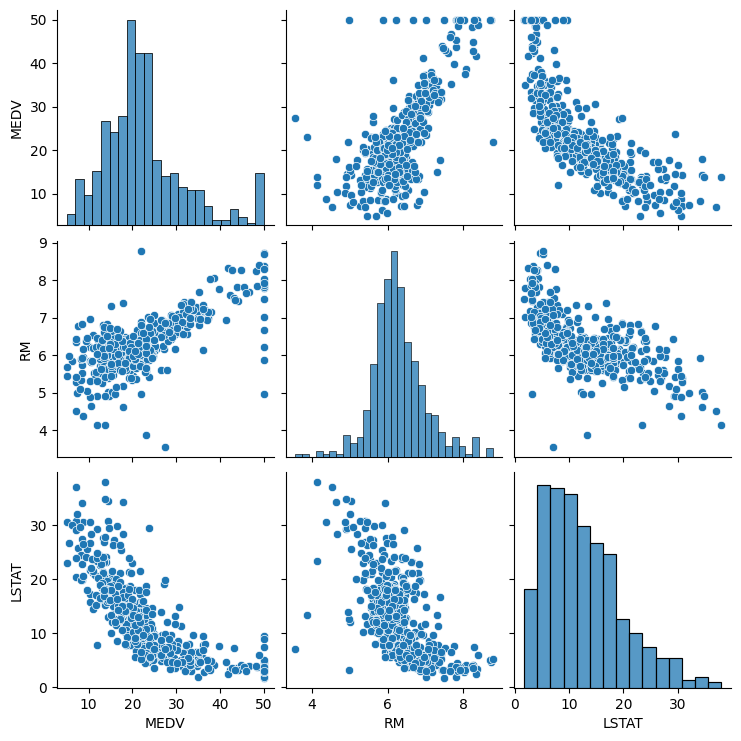

In [28]:
# 간단한 산점도
sns.pairplot(data[['MEDV', 'RM','LSTAT']])

In [38]:
def cal_vif(df):
  # VIF 출력을 위한 데이터 프레임 형성
  vif = pd.DataFrame()

  # VIF 값과 각 feature 이름 설정
  vif['VIF_Factor'] = [variance_inflation_factor(df.values, i) for i in range(data.shape[1])]
  vif['Feature'] = df.columns

  # VIF 값이 높은 순으로 정렬
  vif = vif.sort_values(by='VIF_Factor', ascending=False)
  vif = vif.reset_index().drop(columns='index')
  return vif

cal_vif(data)


,VIF_Factor,Feature
0,136.875365,RM
1,91.819346,PTRATIO
2,74.549360,NOX
3,61.939733,TAX
4,37.854383,MEDV
5,21.669504,B
6,21.541039,AGE
7,16.044949,DIS
8,15.404871,RAD
9,14.755787,INDUS


VIF 10 이상이면 제거해주는게 좋은데, 10 이상인 feature가 11개니까 우선 가장 VIF가 높은 RM을 지워서 실행한다.
(reference: https://signature95.tistory.com/18)

1번째 VIF 측정
Max VIF feature & value : RM, 136.87536508826085
2번째 VIF 측정
Max VIF feature & value : TAX, 72.36814995542797
3번째 VIF 측정
Max VIF feature & value : NOX, 59.92707600382466
4번째 VIF 측정
Max VIF feature & value : DIS, 55.03743648686375
5번째 VIF 측정
Max VIF feature & value : TAX, 23.178115127470832
6번째 VIF 측정
Max VIF feature & value : NOX, 15.327774051240777
7번째 VIF 측정
Max VIF feature & value : AGE, 11.867610188739521
8번째 VIF 측정
Max VIF feature & value : INDUS, 6.951560104851184


CRIM의 vif는 2.07입니다.
ZN의 vif는 2.49입니다.
INDUS의 vif는 6.95입니다.
CHAS의 vif는 1.11입니다.
DIS의 vif는 4.02입니다.
RAD의 vif는 4.72입니다.
LSTAT의 vif는 6.93입니다.
CAT. MEDV의 vif는 1.41입니다.


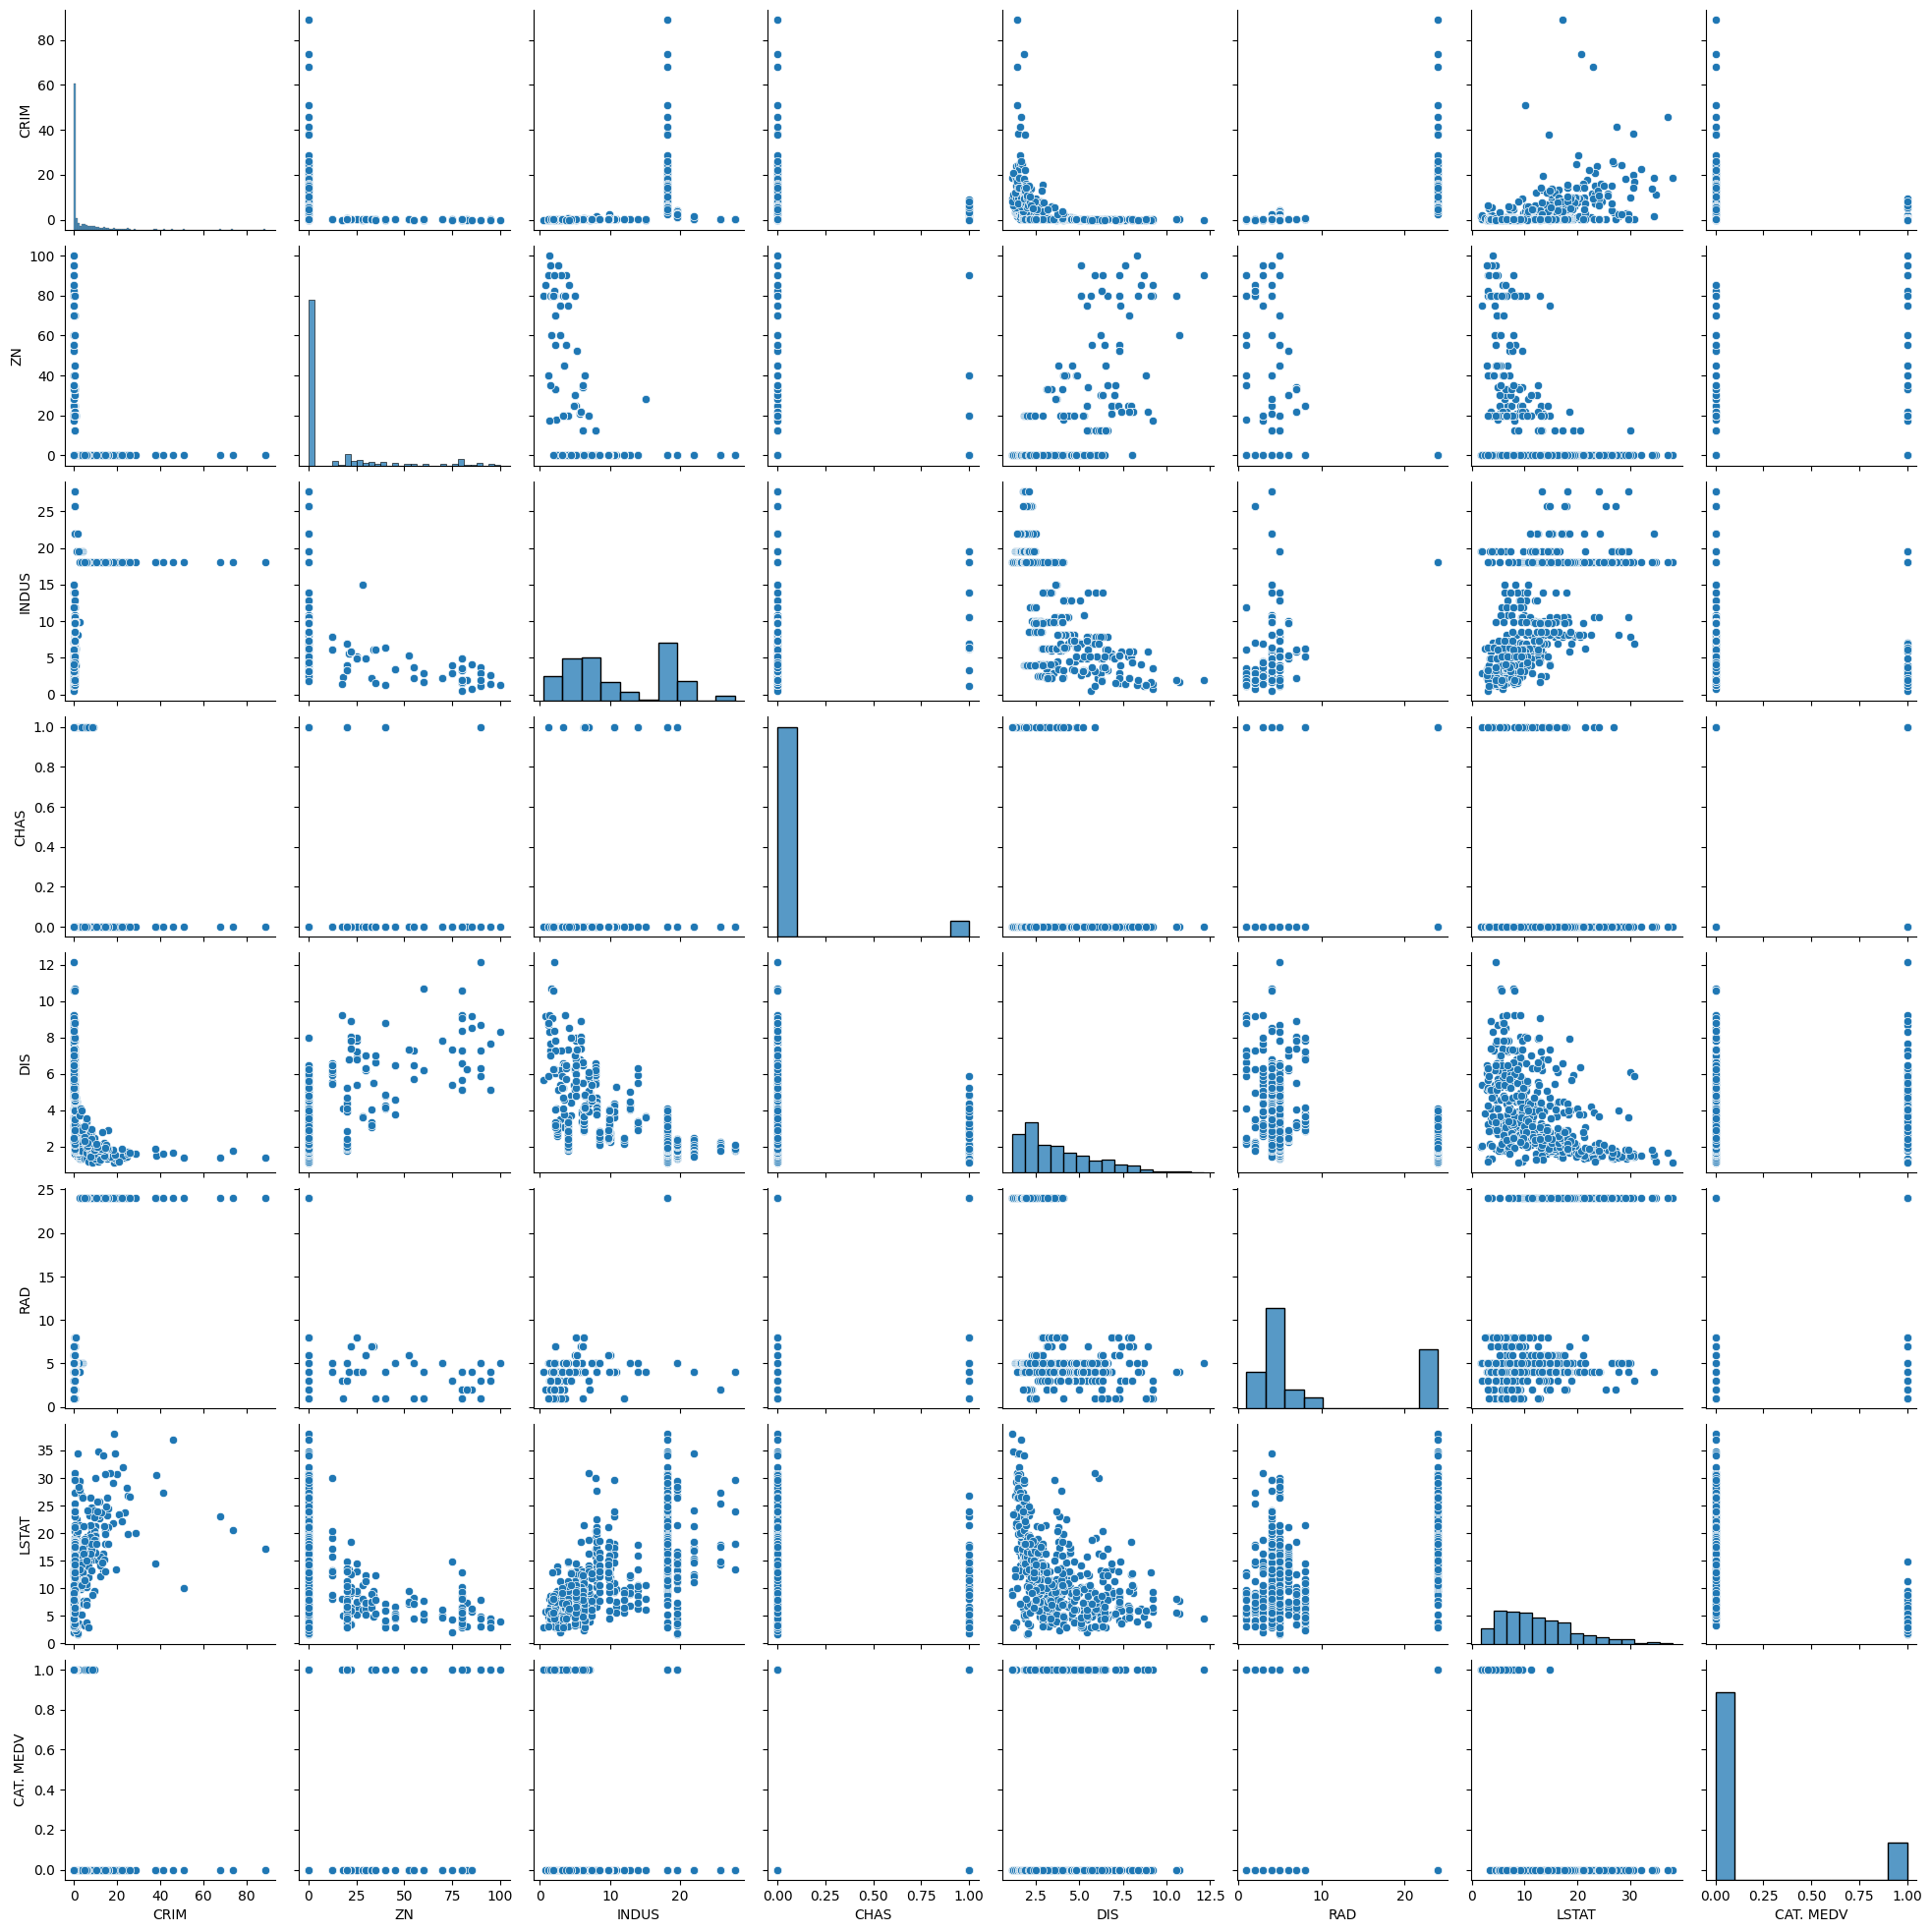

In [46]:
def cal_vif2(x):
    # vif 10 이상일 때 drop을 위한 임계값 설정
    thresh = 10

    # Filter method로 feature selection 진행 후 최종 도출 될 데이터 프레임 형성
    output = pd.DataFrame()

    # 데이터의 컬럼 개수 설정
    k = x.shape[1]

    # VIF 측정
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    for i in range(1,k):
        print(f'{i}번째 VIF 측정')
        # VIF 최대 값 선정
        a = np.argmax(vif)
        print(f'Max VIF feature & value : {x.columns[a]}, {vif[a]}')

        # VIF 최대 값이 임계치를 넘지 않는 경우 break
        if (vif[a] <= thresh):
            print('\n')
            for q in range(output.shape[1]):
                print(f'{output.columns[q]}의 vif는 {np.round(vif[q],2)}입니다.')
            break

        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        if (i == 1):
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]

        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        elif (i > 1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

data2 = cal_vif2(data)
data2

sns.pairplot(data2)

# [후진소거법]
- 모델을 돌리고난 뒤에 변수를 전체부터 하나씩 제거하는 방법이다.

## 1. RFE (Recursive Feature Elimination)
원하는 개수의 변수들이 남을 때까지 학습을 반복하며 유의미하지 않은 변수들을 제거해나가는 Backward 방식

In [64]:
X, y = make_classification(n_samples=1000, n_features=50, random_state=42)
display(X.shape, y.shape)

(1000, 50)

(1000,)

In [95]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE, RFECV
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

clf = LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.01)

# 전체 변수 50개에서 20개가 남을 때까지 변수를 2개씩 줄여가면서 학습을 반복
selector = RFE(clf, n_features_to_select=20, step=2)
selector = selector.fit(X,y)

[LightGBM] [Info] Number of positive: 501, number of negative: 499
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501000 -> initscore=0.004000
[LightGBM] [Info] Start training from score 0.004000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 501, number of negative:

In [96]:
# 최적으로 선택된 변수 확인
selector.support_

array([False,  True,  True,  True, False,  True, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True, False,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False])

In [97]:
# 최적으로 선택된 변수의 개수 20개
selector.support_.sum()

20

## 2. RFE CV(Recursive Feature Elimination Cross validation)

RFE는 남길 변수의 개수를 지정해줘야한다. RFE CV를 사용하면 낮은 변수 중요도를 갖는 변수들을 제거하는데, 변수를 제거하며 학습할 때마다 Cross Validation을 활용해 성능을 계산한다.

=> 몇개의 변수를 사용할 때 성능이 제일 좋은 지 확인 가능

In [99]:
clf = LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.01)

# 10개 이하의 변수가 남으면 정지 (최소한으로 선택할 변수의 개수)
min_features_to_select = 10

# 매 단계마다 제거할 변수의 개수
step = 3

#cv: Cross Validation을 할 때 사용할 폴드의 개수
selector2 = RFECV(clf, step=step, cv=5, min_features_to_select = min_features_to_select)
selector2 = selector2.fit(X,y)

[LightGBM] [Info] Number of positive: 401, number of negative: 399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501250 -> initscore=0.005000
[LightGBM] [Info] Start training from score 0.005000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 401, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead 

In [100]:
# 최적의 변수 개수 11개
selector2.support_.sum()

11

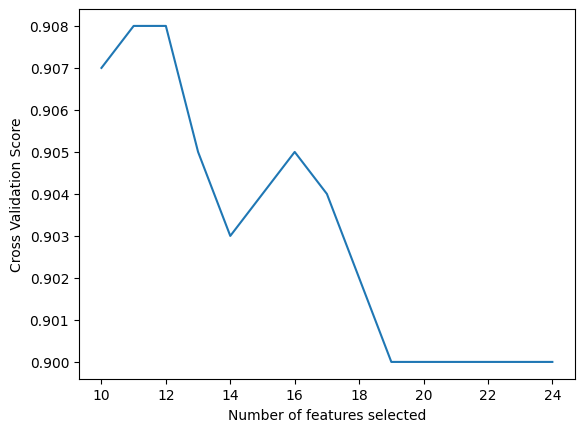

In [101]:
n_scores = len(selector2.cv_results_["mean_test_score"])

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross Validation Score")

plt.plot(
    range(min_features_to_select, n_scores + min_features_to_select),
    selector2.cv_results_["mean_test_score"],
)